**KNOWING YOUR DATA**




In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('india-usa_innings_data.csv')

# Display basic information
print(df.info())

# Show summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   batter                     236 non-null    object 
 1   bowler                     236 non-null    object 
 2   non_striker                236 non-null    object 
 3   runs_batter                236 non-null    int64  
 4   runs_extras                236 non-null    int64  
 5   runs_total                 236 non-null    int64  
 6   wickets_0_player_out       11 non-null     object 
 7   wickets_0_kind             11 non-null     object 
 8   team                       236 non-null    object 
 9   over                       236 non-null    int64  
 10  extras_wides               5 non-null      float64
 11  wickets_0_fielders_0_name  8 non-null      object 
 12  review_by                  1 non-null      object 
 13  review_umpire              1 non-null      object 

# DATA MANIPULATION

In [17]:
# Standardize categorical data (example: names to lowercase)
df['batter'] = df['batter'].str.lower()
df['bowler'] = df['bowler'].str.lower()
df['non_striker'] = df['non_striker'].str.lower()

# astype() method returns a new DataFrame where the data types has been changed to the specified type


In [18]:
df.fillna(value={'runs_extras': 0, 'extras_wides': 0, 'extras_byes': 0, 'extras_noballs': 0,
                 'extras_legbyes': 0, 'extras_penalty': 0}, inplace=True)

In [19]:
df.isnull().sum()

batter                         0
bowler                         0
non_striker                    0
runs_batter                    0
runs_extras                    0
runs_total                     0
wickets_0_player_out         225
wickets_0_kind               225
team                           0
over                           0
extras_wides                   0
wickets_0_fielders_0_name    228
review_by                    235
review_umpire                235
review_batter                235
review_decision              235
review_type                  235
extras_legbyes                 0
wickets_0_fielders_1_name    235
extras_noballs                 0
extras_penalty                 0
dtype: int64

In [23]:
df.head()

,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wickets_0_player_out,wickets_0_kind,team,over,...,wickets_0_fielders_0_name,review_by,review_umpire,review_batter,review_decision,review_type,extras_legbyes,wickets_0_fielders_1_name,extras_noballs,extras_penalty
0,shayan jahangir,arshdeep singh,sr taylor,0,0,0,Shayan Jahangir,lbw,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
1,ags gous,arshdeep singh,sr taylor,0,0,0,NaN,NaN,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
2,ags gous,arshdeep singh,sr taylor,0,0,0,NaN,NaN,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
3,ags gous,arshdeep singh,sr taylor,0,1,1,NaN,NaN,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
4,ags gous,arshdeep singh,sr taylor,2,0,2,NaN,NaN,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0


# VISUALIZING AND ANALYZING THE DATA

In [26]:
import seaborn as sns


**TYPES OF RUNS BY EACH TEAM**

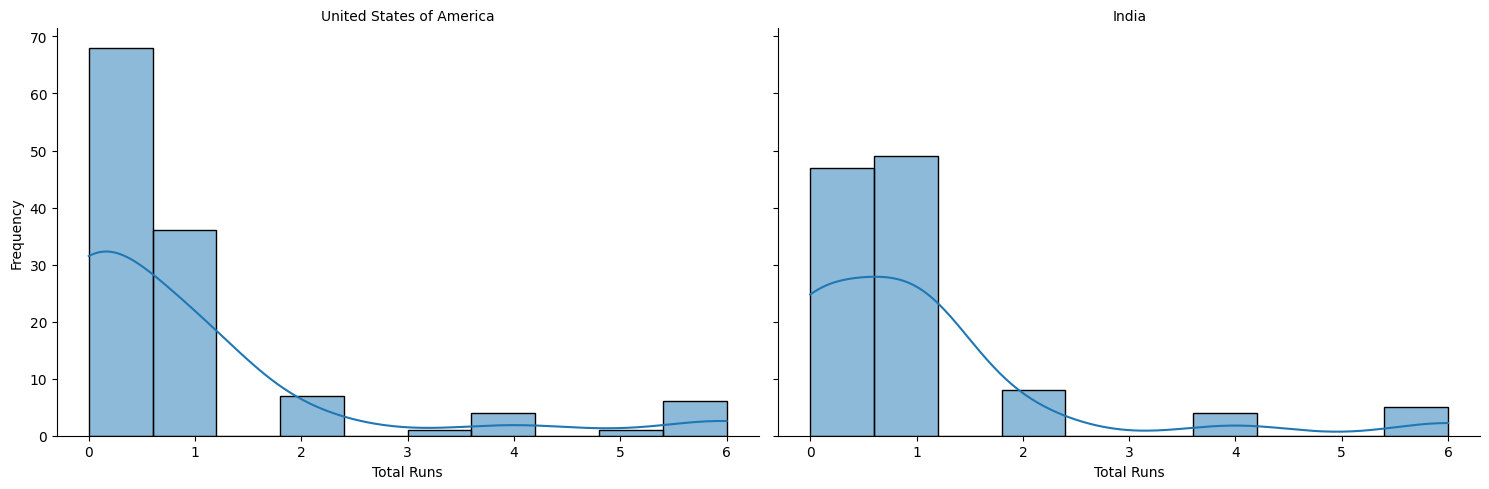

In [96]:
g = sns.FacetGrid(df, col='team', col_wrap=2, height=5, aspect=1.5)
g.map(sns.histplot, 'runs_total', bins=10, kde=True)
g.set_titles('{col_name}')
g.set_axis_labels('Total Runs', 'Frequency')
plt.show()


**INDIVIDUAL BATTER AND BOWLER ANALYSIS**

In [51]:
# Total runs scored by each batter & Average runs per ball for each batter
batter_stats = df.groupby('batter').agg({
 'runs_batter': ['sum', 'mean', 'max'],
}).reset_index()

batter_stats.columns = ['batter', 'total_runs', 'avg_runs_per_ball',
                          'max_runs_in_ball']
print(batter_stats)

# Total wickets taken by each bowler
bowler_stats = df.groupby('bowler').agg({
 'wickets_0_player_out': 'count',
 'runs_total': 'sum'
}).reset_index()

bowler_stats.columns = ['bowler', 'wickets_taken', 'runs_conceded']
print(bowler_stats)



              batter  total_runs  avg_runs_per_ball  max_runs_in_ball
0        aaron jones          11           0.500000                 6
1           ags gous           2           0.333333                 2
2        cj anderson          15           1.250000                 6
3      harmeet singh          10           1.000000                 6
4      jasdeep singh           2           0.285714                 1
5           nr kumar          27           1.125000                 6
6          rg sharma           3           0.500000                 1
7            rr pant          18           0.900000                 6
8             s dube          31           0.837838                 6
9           sa yadav          50           1.020408                 6
10  sc van schalkwyk          11           1.100000                 4
11   shayan jahangir           0           0.000000                 0
12         sr taylor          24           0.774194                 6
13           v kohli

In [57]:
# batter_stats['total_balls'] = df.groupby('batter').size()
# print(batter_stats['total_balls'])
total_balls=df.groupby('batter').size()
batter_stats['total_balls'] = total_balls.values
print(batter_stats)

              batter  total_runs  avg_runs_per_ball  max_runs_in_ball  \
0        aaron jones          11           0.500000                 6   
1           ags gous           2           0.333333                 2   
2        cj anderson          15           1.250000                 6   
3      harmeet singh          10           1.000000                 6   
4      jasdeep singh           2           0.285714                 1   
5           nr kumar          27           1.125000                 6   
6          rg sharma           3           0.500000                 1   
7            rr pant          18           0.900000                 6   
8             s dube          31           0.837838                 6   
9           sa yadav          50           1.020408                 6   
10  sc van schalkwyk          11           1.100000                 4   
11   shayan jahangir           0           0.000000                 0   
12         sr taylor          24           0.774194

In [58]:
batter_stats['strike_rate'] = (batter_stats['total_runs'] / batter_stats['total_balls'])*100
print(batter_stats)

              batter  total_runs  avg_runs_per_ball  max_runs_in_ball  \
0        aaron jones          11           0.500000                 6   
1           ags gous           2           0.333333                 2   
2        cj anderson          15           1.250000                 6   
3      harmeet singh          10           1.000000                 6   
4      jasdeep singh           2           0.285714                 1   
5           nr kumar          27           1.125000                 6   
6          rg sharma           3           0.500000                 1   
7            rr pant          18           0.900000                 6   
8             s dube          31           0.837838                 6   
9           sa yadav          50           1.020408                 6   
10  sc van schalkwyk          11           1.100000                 4   
11   shayan jahangir           0           0.000000                 0   
12         sr taylor          24           0.774194

In [61]:
# Economy Rate Calculation:

overs_bowled = df.groupby('bowler')['over'].max()

bowler_stats['overs_bowled'] = overs_bowled.values
bowler_stats['economy_rate'] = (bowler_stats['runs_conceded'] /
                                 bowler_stats['overs_bowled'])

print(bowler_stats)

              bowler  wickets_taken  runs_conceded  overs_bowled  economy_rate
0           ali khan              1             22            18      1.222222
1           ar patel              1             25            13      1.923077
2     arshdeep singh              4              9            17      0.529412
3        cj anderson              0             22            14      1.571429
4          hh pandya              2             15            16      0.937500
5      jasdeep singh              0             24            15      1.600000
6          jj bumrah              0             25            18      1.388889
7     mohammed siraj              1             25            19      1.315789
8             s dube              0             11             8      1.375000
9   sc van schalkwyk              0             25            16      1.562500
10    sn netravalkar              2             18            17      1.058824


In [65]:
df['batter_bowler_runs'] = df.groupby(['batter', 'bowler'])['runs_batter'].transform('mean')
print(df['batter_bowler_runs'])

0      0.000000
1      0.333333
2      0.333333
3      0.333333
4      0.333333
         ...   
231    1.076923
232    1.076923
233    1.750000
234    0.444444
235    0.444444
Name: batter_bowler_runs, Length: 236, dtype: float64


**BATTER BOWLER RELATION**

In [71]:
# Calculate average runs scored by each batter against each bowler
batter_bowler_runs = df.groupby(['batter', 'bowler'])['runs_batter'].mean().reset_index()
batter_bowler_runs['batter_bowler_runs'] = batter_bowler_runs['runs_batter'].round().astype(int)
batter_bowler_runs.drop('runs_batter', axis=1, inplace=True)

# Display the result
print("Average runs scored by each batter against each bowler:")
print(batter_bowler_runs)


Average runs scored by each batter against each bowler:
              batter            bowler  batter_bowler_runs
0        aaron jones    arshdeep singh                   0
1        aaron jones         hh pandya                   0
2        aaron jones         jj bumrah                   0
3        aaron jones    mohammed siraj                   1
4           ags gous    arshdeep singh                   0
5        cj anderson          ar patel                   2
6        cj anderson    arshdeep singh                   1
7        cj anderson         hh pandya                   0
8        cj anderson         jj bumrah                   1
9      harmeet singh    arshdeep singh                   0
10     harmeet singh         hh pandya                   0
11     harmeet singh         jj bumrah                   4
12     jasdeep singh    arshdeep singh                   0
13     jasdeep singh         jj bumrah                   0
14     jasdeep singh    mohammed siraj                   0


**SECTIONING OF THE GAME**

In [72]:
#  The first 6 overs of a T20 match are the “powerplay,” where fielding restrictions are in place.

df['is_powerplay'] = df['over'] < 6

# The last few overs of an inning often see accelerated scoring.

df['is_death_overs'] = df['over'] >= 15

#  Wickets become more valuable as the innings progress.

df['wicket_value'] = df['wickets_0_player_out'].fillna(0) * (df['over'] + 1)

In [87]:
    # Running total of team score

df['running_team_score'] = df.groupby('team')['runs_total'].cumsum()

    # Running average of runs per over

df['running_avg_runs_per_over'] = df.groupby('team')['runs_total'].expanding().mean().reset_index(level=0, drop=True)

    # balls since last wicket
df['wickets_0_player_out'] = pd.to_numeric(df['wickets_0_player_out'], errors='coerce')
df['wickets_0_player_out'] = df['wickets_0_player_out'].fillna(0)
df['balls_since_last_wicket'] = df.groupby('team').cumcount() - df.groupby('team')['wickets_0_player_out'].cumsum().fillna(method='ffill') - 1

In [90]:
# Batter’s runs in last 10 balls

df['batter_last_10_balls'] = df.groupby('batter')['runs_batter'].rolling(window=10, min_periods=1).sum().reset_index(level=0, drop=True)

    # Bowler’s economy rate in last 2 overs

df['bowler_last_12_balls_economy'] = df.groupby('bowler')['runs_total'].rolling(window=12, min_periods=1).mean().reset_index(level=0, drop=True) * 6

    # Team’s run rate in last 5 overs compared to overall run rate

df['team_last_5_overs_run_rate'] = df.groupby('team')['runs_total'].rolling(window=30, min_periods=1).mean().reset_index(level=0, drop=True)

df['team_overall_run_rate'] = df.groupby('team')['runs_total'].expanding().mean().reset_index(level=0, drop=True)

df['team_momentum'] = df['team_last_5_overs_run_rate'] - df['team_overall_run_rate']



In [93]:
# Top batsmen by total runs
top_batsmen = df.groupby('batter')['runs_batter'].sum().sort_values(ascending=False).head(10)
print("Top 10 Batsmen by Total Runs:\n", top_batsmen)

# Top bowlers by wickets taken
top_bowlers = df[df['wickets_0_player_out'].notna()].groupby('bowler')['wickets_0_player_out'].count().sort_values(ascending=False).head(10)
print("Top 10 Bowlers by Wickets Taken:\n", top_bowlers)


Top 10 Batsmen by Total Runs:
 batter
sa yadav            50
s dube              31
nr kumar            27
sr taylor           24
rr pant             18
cj anderson         15
aaron jones         11
sc van schalkwyk    11
harmeet singh       10
rg sharma            3
Name: runs_batter, dtype: int64
Top 10 Bowlers by Wickets Taken:
 bowler
arshdeep singh      25
jasdeep singh       25
jj bumrah           25
hh pandya           24
mohammed siraj      24
sc van schalkwyk    24
sn netravalkar      24
ali khan            21
ar patel            19
cj anderson         19
Name: wickets_0_player_out, dtype: int64


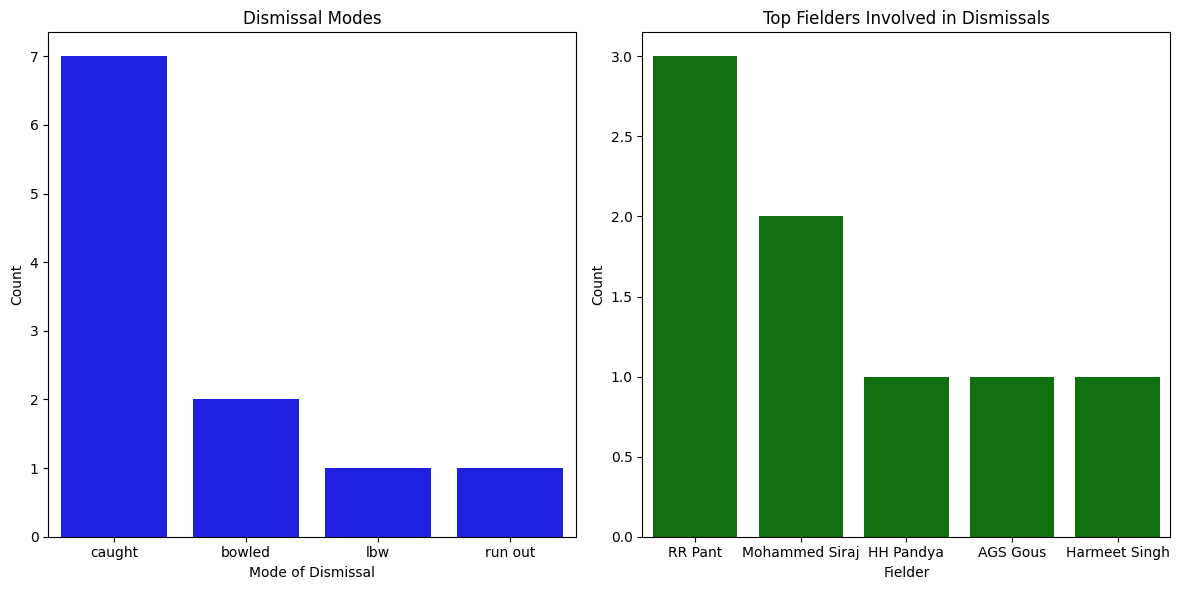

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Dismissal modes
dismissal_modes = df['wickets_0_kind'].value_counts()
plt.subplot(1, 2, 1)  # First subplot
sns.barplot(x=dismissal_modes.index, y=dismissal_modes.values, color='blue')
plt.title('Dismissal Modes')
plt.xlabel('Mode of Dismissal')
plt.ylabel('Count')

# Fielders involved in dismissals
fielders = df['wickets_0_fielders_0_name'].value_counts().head(10)
plt.subplot(1, 2, 2)  # Second subplot
sns.barplot(x=fielders.index, y=fielders.values, color='green')
plt.title('Top Fielders Involved in Dismissals')
plt.xlabel('Fielder')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



Impact of Wickets on Scoring Rate:
      over  wickets_0_player_out  prev_scoring_rate  next_scoring_rate  \
1       0                   0.0           0.000000           0.000000   
2       0                   0.0           0.000000           0.250000   
3       0                   0.0           0.000000           0.600000   
4       0                   0.0           0.250000           0.500000   
5       0                   0.0           0.600000           0.428571   
..    ...                   ...                ...                ...   
230    17                   0.0           0.939130           0.931034   
231    17                   0.0           0.935065           0.931330   
232    17                   0.0           0.931034           0.931624   
233    18                   0.0           0.931330           0.931915   
234    18                   0.0           0.931624           0.936441   

     change_in_scoring_rate  
1                  0.000000  
2                  0.250000

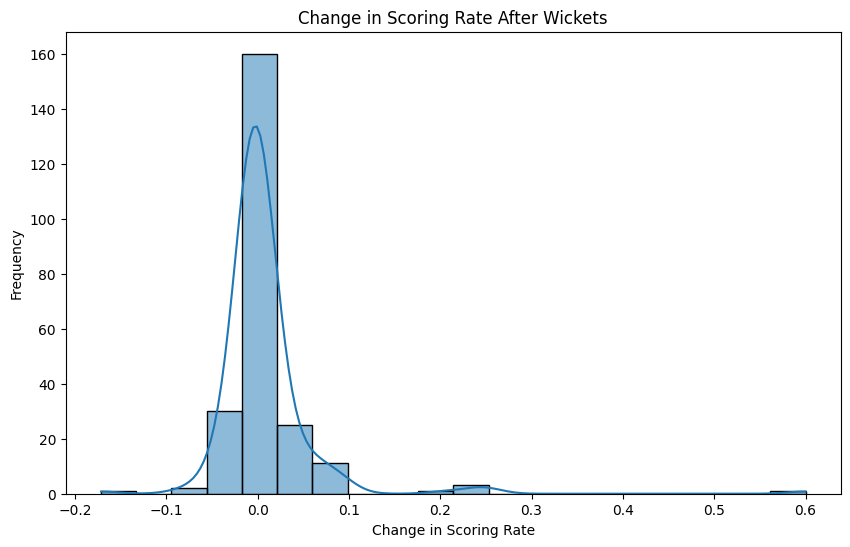

In [112]:
# Calculate the scoring rate before and after wickets
df['cumulative_runs'] = df['runs_total'].cumsum()
df['cumulative_balls'] = df.index + 1
df['scoring_rate'] = df['cumulative_runs'] / df['cumulative_balls']

# Filter data to only include balls where a wicket fell
wicket_events = df[df['wickets_0_player_out'].notna()]

# Calculate the average scoring rate before and after each wicket
wicket_events['prev_scoring_rate'] = wicket_events['scoring_rate'].shift(1)
wicket_events['next_scoring_rate'] = wicket_events['scoring_rate'].shift(-1)

# Drop rows with NaN values resulting from shifting
wicket_events.dropna(subset=['prev_scoring_rate', 'next_scoring_rate'], inplace=True)

# Calculate the change in scoring rate
wicket_events['change_in_scoring_rate'] = wicket_events['next_scoring_rate'] - wicket_events['prev_scoring_rate']

print("Impact of Wickets on Scoring Rate:\n", wicket_events[['over', 'wickets_0_player_out', 'prev_scoring_rate', 'next_scoring_rate', 'change_in_scoring_rate']])

# Visualize the change in scoring rate after wickets
plt.figure(figsize=(10, 6))
sns.histplot(wicket_events['change_in_scoring_rate'], kde=True, bins=20)
plt.title('Change in Scoring Rate After Wickets')
plt.xlabel('Change in Scoring Rate')
plt.ylabel('Frequency')
plt.show()


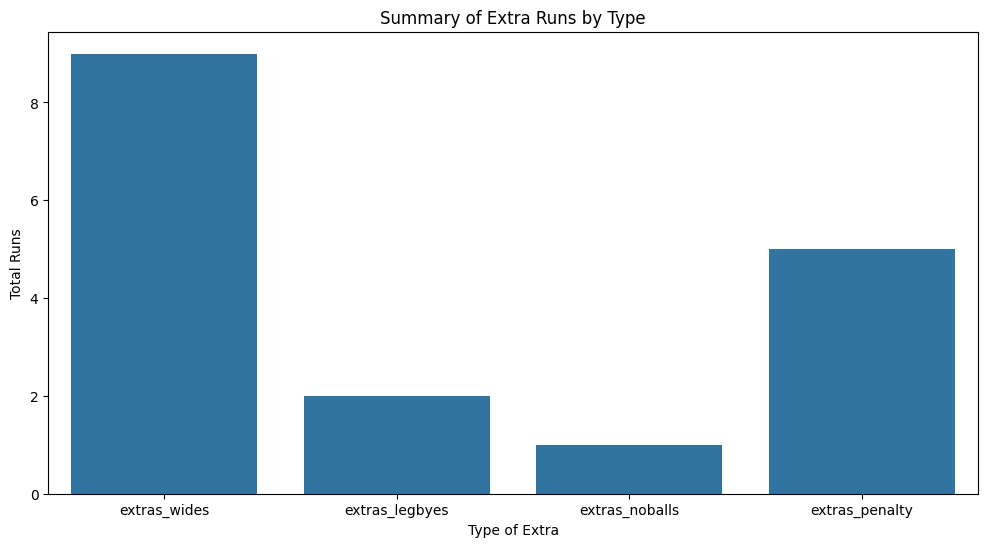

In [106]:
# Total extras by type
extras_summary = df[['extras_wides', 'extras_legbyes', 'extras_noballs', 'extras_penalty']].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=extras_summary.index, y=extras_summary.values)
plt.title('Summary of Extra Runs by Type')
plt.xlabel('Type of Extra')
plt.ylabel('Total Runs')
plt.show()
